In [6]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts,RepeatedKFold ,cross_val_score ,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv(r"D:\Downloadd\Harshada\DATA\Ridge_car_data.txt.csv")
df.dropna(inplace=True)
df.drop("car name",axis=1,inplace=True)
df.head()

,mpg,cylinders,displacement,weight,acceleration,model year,horsepower,origin
0,18.0,8,307.0,3504,12.0,70,130.0,1
1,15.0,8,350.0,3693,11.5,70,165.0,1
2,18.0,8,318.0,3436,11.0,70,150.0,1
3,16.0,8,304.0,3433,12.0,70,150.0,1
4,17.0,8,302.0,3449,10.5,70,140.0,1


* Data Spliting and scaling

In [5]:
ind = df[['mpg']]
dep = df.drop("mpg",axis=1)

x_train,x_test,y_train,y_test = tts(dep,ind,train_size=0.8,random_state=1)

print(x_test.shape)
print(x_train.shape)

scale=StandardScaler()
x_train_scale=scale.fit_transform(x_train)
x_test_scale=scale.fit_transform(x_test)

(79, 7)
(313, 7)


In [7]:
import numpy as np
from sklearn.linear_model import ElasticNet
Score = []
coeff = []
intercept = []
R_square = []
Adj_rsq =[]
MSE_train = []
MSE_test = []
alpha= np.arange(1,20)


for i in alpha:
    model = ElasticNet(alpha=i)

    # model fitting
    rd = model.fit(x_train,y_train)
    coeff.append(rd.coef_)
    intercept.append(rd.intercept_)
    R_square.append(r2_score(rd.predict(x_test),y_test))
    Adj_rsq.append(1 - (1 - np.mean(np.array(R_square)) * (len(x_test) - 1) / (len(x_test) - len(x_test.columns) - 1)))
    MSE_train.append(mean_squared_error(rd.predict(x_train),y_train))
    MSE_test.append(mean_squared_error(rd.predict(x_test),y_test))


In [8]:
int=pd.DataFrame(intercept)
int.columns = ["intercept"]
coeffs = pd.DataFrame(np.matrix(np.array(coeff)),columns=x_train.columns)
en_ = pd.DataFrame({
    "alpha" : alpha,
    "R_squre" : R_square,
    "Adj_rsquare" :Adj_rsq,
    "MSE_train" : MSE_train,
    "MSE_test" : MSE_test
    
})
en_data= pd.concat([en_,int,coeffs],axis=1)
en_data

,alpha,R_squre,Adj_rsquare,MSE_train,MSE_test,intercept,cylinders,displacement,weight,acceleration,model year,horsepower,origin
0,1,0.755855,0.830376,11.508870,12.607842,-7.133973,0.0,0.001878,-0.006544,0.0,0.665164,-0.009379,0.011931
1,2,0.744025,0.823878,11.686632,12.866175,-1.998029,0.0,0.000000,-0.006376,0.0,0.597320,-0.010424,0.000000
2,3,0.730931,0.816917,11.915823,13.185117,2.747409,0.0,-0.000000,-0.006365,0.0,0.537228,-0.012495,0.000000
3,4,0.717194,0.809663,12.204079,13.548101,7.131331,-0.0,-0.000264,-0.006336,0.0,0.481254,-0.014144,0.000000
4,5,0.703060,0.802206,12.539923,13.947288,11.176103,-0.0,-0.001088,-0.006263,0.0,0.428608,-0.015179,0.000000
5,6,0.688551,0.794577,12.908143,14.372789,14.933358,-0.0,-0.001849,-0.006200,0.0,0.379729,-0.016039,0.000000
6,7,0.673831,0.786818,13.300095,14.816406,18.431064,-0.0,-0.002565,-0.006146,0.0,0.334233,-0.016717,0.000000
7,8,0.658978,0.778960,13.708970,15.272112,21.698812,-0.0,-0.003216,-0.006099,0.0,0.291767,-0.017280,0.000000
8,9,0.644089,0.771030,14.129409,15.734954,24.758883,-0.0,-0.003808,-0.006060,0.0,0.252036,-0.017740,0.000000
9,10,0.629265,0.763057,14.557214,16.201033,27.628888,-0.0,-0.004360,-0.006027,0.0,0.214791,-0.018081,0.000000


Text(0.5, 1.0, 'Lambda V/c coefficeints')

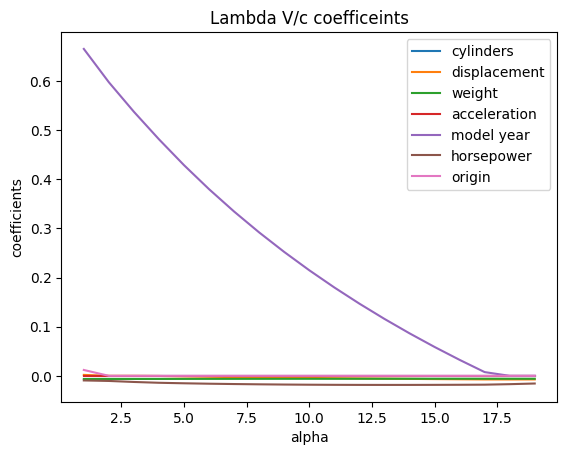

In [9]:
ax= plt.gca()

ax.plot(en_data["alpha"],coeffs,label = x_test.columns)
plt.legend()
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lambda V/c coefficeints')

Text(0.5, 1.0, 'Overfitting and Underfitting')

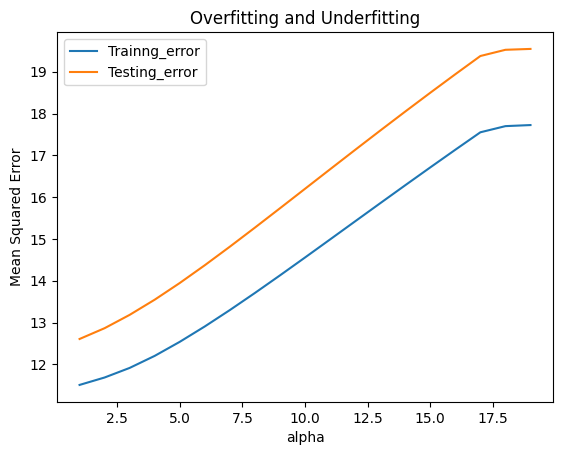

In [10]:
# overfit _ underfit 
plt.plot(alpha,en_data.MSE_train,label="Trainng_error")
plt.plot(alpha,en_data.MSE_test,label="Testing_error")
plt.legend()
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error')
plt.title('Overfitting and Underfitting')